#### Hypothesis 2: What are the healthcare innovations that can be derived from all the research papers published? Is there some topics that contribute to AI-driven healthcare innovations?

In [ ]:
import pandas as pd
import os


file_path = r'neurips_arxiv.csv'
columns_to_keep = ['title', 'authors', 'categories', 'abstract', 'update_date']

if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

chunks = []


chunk_size = 10000  # Adjust this size based on your system's memory capacity
with pd.read_csv(file_path, chunksize=chunk_size) as reader:
    for i, chunk in enumerate(reader):
       
        if i == 0:
            print("Columns in the first chunk:", chunk.columns.tolist())
        
        
        present_columns = [col for col in columns_to_keep if col in chunk.columns]
        chunk_filtered = chunk[present_columns]
        
        
        if chunk_filtered.empty:
            print(f"Chunk {i} is empty after filtering columns.")
        else:
            # Append the filtered chunk to the list
            chunks.append(chunk_filtered)
df= pd.concat(chunks, ignore_index=True)

Columns in the first chunk: ['title', 'authors', 'categories', 'abstract', 'update_date', 'authors_parsed']


#### There are 6 categories whose content matter contribute to healthcare innovations, namely: 'cs.LG', 'cs.CY', 'q-bio.NC', 'eess.IV', 'eess.SP', 'stat.ML' Analysing the Research category trends over time for these topics

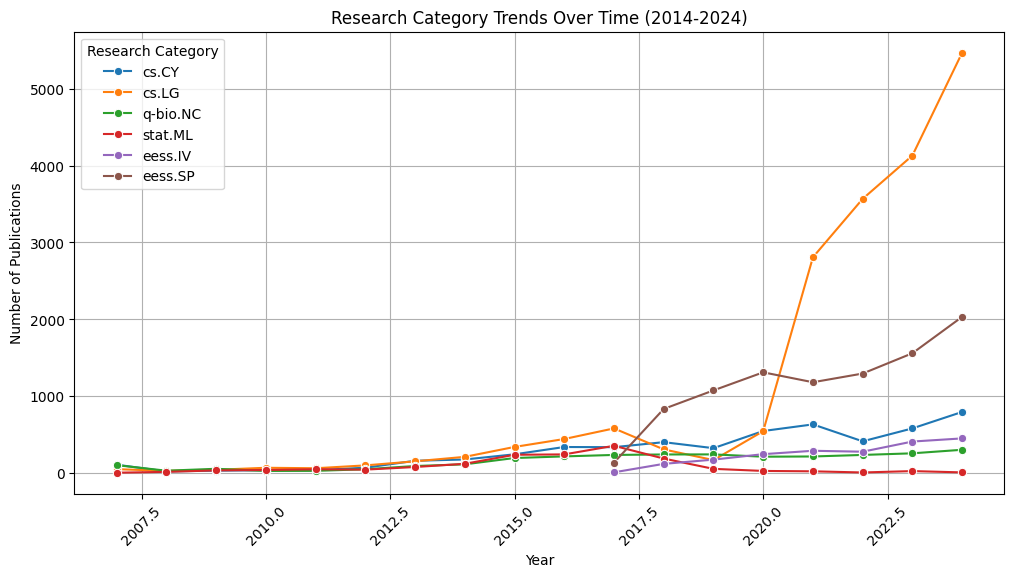

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'update date' is in string format, convert to datetime and extract year
df['update_date'] = pd.to_datetime(df['update_date'], errors='coerce')  # Convert to datetime
df['year'] = df['update_date'].dt.year  # Extract year

# Filter for relevant research categories
relevant_categories = ['cs.LG', 'cs.CY', 'q-bio.NC', 'eess.IV', 'eess.SP', 'stat.ML']
df_filtered = df[df['categories'].isin(relevant_categories)]

# Group by year and category, and count occurrences
category_trends = df_filtered.groupby(['year', 'categories']).size().reset_index(name='count')

# Plot the trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_trends, x='year', y='count', hue='categories', marker="o")

# Customize the plot
plt.title('Research Category Trends Over Time (2014-2024)')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend(title='Research Category')
plt.grid(True)
plt.xticks(rotation=45)

# Show plot
plt.show()


#### Combining title and abstract for more comprehensive feature extraction. Using TF-IDF for vectorisation and then SVC for the prediction.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

# Filtering data for relevant research categories
relevant_categories = ['CS.LG', 'CS.CY', 'q-bio.NC', 'eess.IV', 'eess.SP', 'stat.ML']
df_filtered = df[df['categories'].isin(relevant_categories)]

df_filtered['text'] = df_filtered['title'] + " " + df_filtered['abstract']

label_encoder = LabelEncoder()
df_filtered['category_label'] = label_encoder.fit_transform(df_filtered['categories'])

X = df_filtered['text'] 
y = df_filtered['category_label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorization and SVM classifier
pipeline = make_pipeline(
    TfidfVectorizer(),
    SVC(kernel='linear', random_state=42)
)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


C:\Users\amrit\AppData\Local\Temp\ipykernel_12104\359754971.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['text'] = df_filtered['title'] + " " + df_filtered['abstract']
C:\Users\amrit\AppData\Local\Temp\ipykernel_12104\359754971.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['category_label'] = label_encoder.fit_transform(df_filtered['categories'])


              precision    recall  f1-score   support

     eess.IV       0.88      0.85      0.87       419
     eess.SP       0.95      0.97      0.96      1920
    q-bio.NC       0.97      0.95      0.96       532
     stat.ML       0.90      0.88      0.89       315

    accuracy                           0.94      3186
   macro avg       0.93      0.91      0.92      3186
weighted avg       0.94      0.94      0.94      3186

